In [41]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns 

In [25]:
data = pd.read_csv("C:/Users/sanke/Documents/MSexcel/emails.csv")

In [26]:
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [27]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [37]:
X = data.iloc[:,1:3001]
y = data.iloc[:,-1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

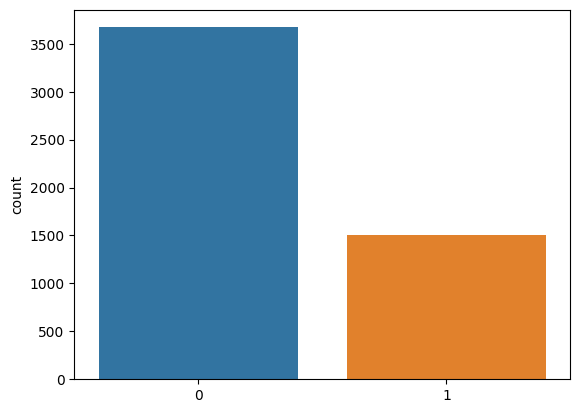

In [38]:
sns.countplot(x=y);

In [30]:
svm = SVC(C=1.0,kernel='rbf',gamma='auto')
svm.fit(X_train, y_train)

SVC(gamma='auto')

In [31]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [32]:
y_pred1 = knn.predict(X_test)
y_pred2 = svm.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred1)
accuracy_svm = accuracy_score(y_test, y_pred2)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("Support Vector Machine Accuracy:", accuracy_svm)

K-Nearest Neighbors Accuracy: 0.8685990338164251
Support Vector Machine Accuracy: 0.9120772946859903


In [33]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

Confusion Matrix:
[[645  94]
 [ 42 254]]


In [34]:
svm_report = classification_report(y_test,y_pred1)
print(svm_report)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       739
           1       0.73      0.86      0.79       296

    accuracy                           0.87      1035
   macro avg       0.83      0.87      0.85      1035
weighted avg       0.88      0.87      0.87      1035

